In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [9]:
merged_data_final = pd.read_csv('merged_data_final.csv')

In [10]:
a = merged_data_final.dtypes
a = list(a)


In [15]:
output_columns = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
all_columns = merged_data_final.columns
input_columns = list(set(all_columns) - set(output_columns))

output_overall_rating = ['review_scores_rating']
overall_input = list(set(all_columns) - set(output_overall_rating))

In [6]:
len(all_columns), len(output_columns), len(input_columns)

(5031, 7, 5024)

# linear regression

In [48]:
for col in output_columns:
    X =merged_data_final[input_columns]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
#     X = preprocessing.normalize(X)
#     X = np.hstack((np.ones((len(merged_data_final[input_columns[0]]), 1)), X))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    linear_model = LinearRegression().fit(X_train, y_train)

    print("\n\nFor ", col)

    y_test_prediction = linear_model.predict(X_test)
    error_scores = -cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')
    


    print("mean squared error on test", error_scores.mean())
    print("------------------------------------------------------")



For  review_scores_rating
mean squared error on test 1215775780996329.8
------------------------------------------------------


For  review_scores_accuracy
mean squared error on test 299039866202747.44
------------------------------------------------------


For  review_scores_cleanliness
mean squared error on test 1050114956329919.8
------------------------------------------------------


For  review_scores_checkin
mean squared error on test 548449380121990.7
------------------------------------------------------


For  review_scores_communication
mean squared error on test 553918762087707.2
------------------------------------------------------


For  review_scores_location
mean squared error on test 77926509675574.73
------------------------------------------------------


For  review_scores_value
mean squared error on test 650244908900784.6
------------------------------------------------------


# scaled Linear

In [49]:
for col in output_columns:
    X =merged_data_final[input_columns]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
#     X = preprocessing.normalize(X)
#     X = np.hstack((np.ones((len(merged_data_final[input_columns[0]]), 1)), X))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    scaler_feature = StandardScaler()
    scaler_label = StandardScaler()
    scaled_train_feature = scaler_feature.fit_transform(X_train)
    scaled_train_label = scaler_label.fit_transform(y_train)
    scaled_test_feature = scaler_feature.fit_transform(X_test)
    scaled_test_label = scaler_label.fit_transform(y_test)
    
    linear_model = LinearRegression().fit(scaled_train_feature, scaled_train_label)

    print("\n\nFor ", col)
    score = linear_model.score(X, y)
    error_scores = -cross_val_score(linear_model, X, y, cv=5, scoring='neg_mean_squared_error')


    print("mean squared error on test", error_scores.mean())
    print("------------------------------------------------------")



For  review_scores_rating
mean squared error on test 1215775780996329.8
------------------------------------------------------


For  review_scores_accuracy
mean squared error on test 299039866202747.44
------------------------------------------------------


For  review_scores_cleanliness
mean squared error on test 1050114956329919.8
------------------------------------------------------


For  review_scores_checkin
mean squared error on test 548449380121990.7
------------------------------------------------------


For  review_scores_communication
mean squared error on test 553918762087707.2
------------------------------------------------------


For  review_scores_location
mean squared error on test 77926509675574.73
------------------------------------------------------


For  review_scores_value
mean squared error on test 650244908900784.6
------------------------------------------------------


# KNN

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

Output Param review_scores_rating
N =  1
Error scores 1.0838735080889603



Output Param review_scores_rating
N =  2
Error scores 0.8027369421367329



Output Param review_scores_rating
N =  5
Error scores 0.6660765053249702



Output Param review_scores_rating
N =  8
Error scores 0.6281253408402592



Output Param review_scores_rating
N =  10
Error scores 0.6108341038784721



Output Param review_scores_rating
N =  15
Error scores 0.5942338914334087



Output Param review_scores_rating
N =  20
Error scores 0.5893532450382601



Output Param review_scores_rating
N =  25
Error scores 0.5825374018935809



Output Param review_scores_rating
N =  30
Error scores 0.5823326171134068





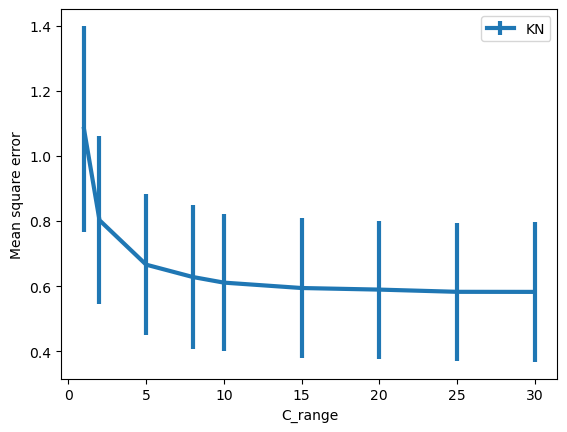

Output Param review_scores_accuracy
N =  1
Error scores 0.258491875522748



Output Param review_scores_accuracy
N =  2
Error scores 0.21453544052349066



Output Param review_scores_accuracy
N =  5
Error scores 0.18053515447806834



Output Param review_scores_accuracy
N =  8
Error scores 0.1718325785299206



Output Param review_scores_accuracy
N =  10
Error scores 0.16724659205075124



Output Param review_scores_accuracy
N =  15
Error scores 0.16288096280620112



Output Param review_scores_accuracy
N =  20
Error scores 0.16105535623503686



Output Param review_scores_accuracy
N =  25
Error scores 0.16010965202057134



Output Param review_scores_accuracy
N =  30
Error scores 0.15985675760552315





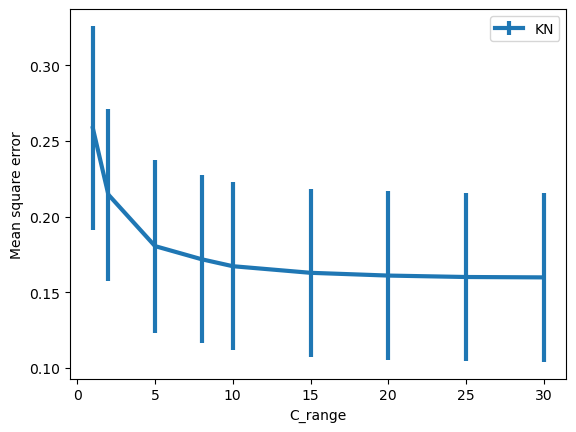

Output Param review_scores_cleanliness
N =  1
Error scores 0.4647233458012212



Output Param review_scores_cleanliness
N =  2
Error scores 0.3721560094941071



Output Param review_scores_cleanliness
N =  5
Error scores 0.31319134890003786



Output Param review_scores_cleanliness
N =  8
Error scores 0.2986945979973902



Output Param review_scores_cleanliness
N =  10
Error scores 0.2895329802281156



Output Param review_scores_cleanliness
N =  15
Error scores 0.2773611423120862



Output Param review_scores_cleanliness
N =  20
Error scores 0.2734716198150091



Output Param review_scores_cleanliness
N =  25
Error scores 0.272314648392424



Output Param review_scores_cleanliness
N =  30
Error scores 0.27059942509985835





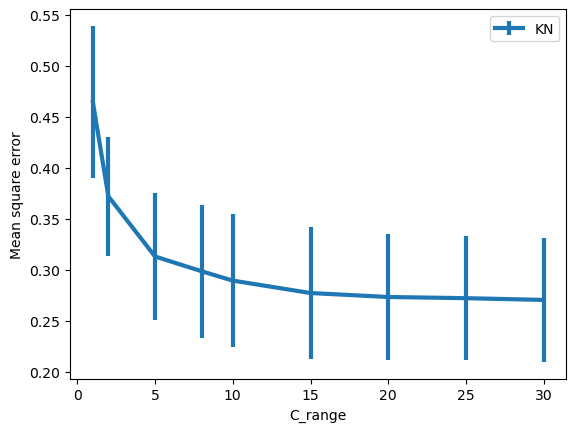

Output Param review_scores_checkin
N =  1
Error scores 0.2073643040978089



Output Param review_scores_checkin
N =  2
Error scores 0.1779977434918294



Output Param review_scores_checkin
N =  5
Error scores 0.14677601891675246



Output Param review_scores_checkin
N =  8
Error scores 0.13938225734456738



Output Param review_scores_checkin
N =  10
Error scores 0.1360360550493608



Output Param review_scores_checkin
N =  15
Error scores 0.13249584993819585



Output Param review_scores_checkin
N =  20
Error scores 0.13127331243220167



Output Param review_scores_checkin
N =  25
Error scores 0.1304795569993456



Output Param review_scores_checkin
N =  30
Error scores 0.1303339191063803





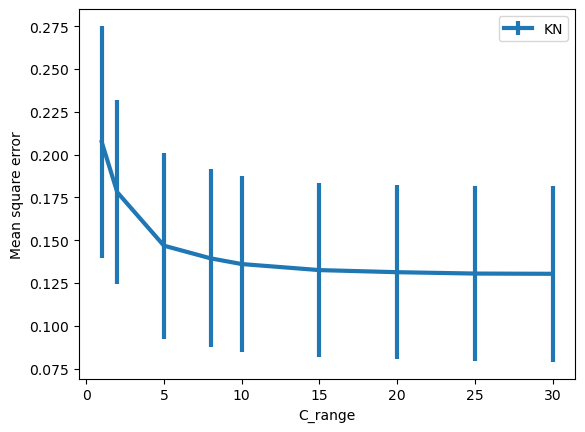

Output Param review_scores_communication
N =  1
Error scores 0.17319630015536905



Output Param review_scores_communication
N =  2
Error scores 0.14675277737259002



Output Param review_scores_communication
N =  5
Error scores 0.1267152904352341



Output Param review_scores_communication
N =  8
Error scores 0.12033211703273523



Output Param review_scores_communication
N =  10
Error scores 0.11820510680572711



Output Param review_scores_communication
N =  15
Error scores 0.11398378144061576



Output Param review_scores_communication
N =  20
Error scores 0.11333473531277224



Output Param review_scores_communication
N =  25
Error scores 0.11357967058929705



Output Param review_scores_communication
N =  30
Error scores 0.11333218258055393





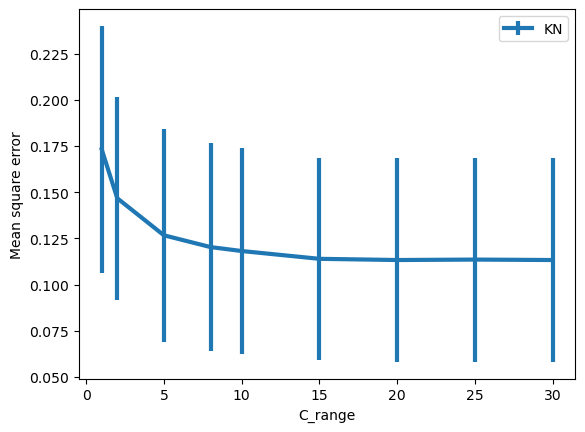

Output Param review_scores_location
N =  1
Error scores 0.2115040302548133



Output Param review_scores_location
N =  2
Error scores 0.17167043789720485



Output Param review_scores_location
N =  5
Error scores 0.1427318083915354



Output Param review_scores_location
N =  8
Error scores 0.1358762690146443



Output Param review_scores_location
N =  10
Error scores 0.1337565589264948



Output Param review_scores_location
N =  15
Error scores 0.1301327985936044



Output Param review_scores_location
N =  20
Error scores 0.12818380492627662



Output Param review_scores_location
N =  25
Error scores 0.12688707662900783



Output Param review_scores_location
N =  30
Error scores 0.12569498064371176





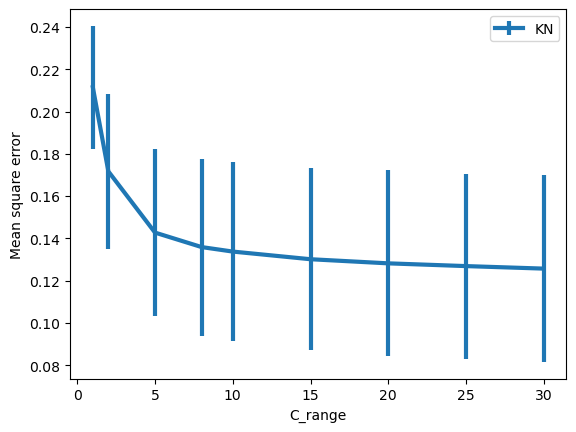

Output Param review_scores_value
N =  1
Error scores 0.3218911233009436



Output Param review_scores_value
N =  2
Error scores 0.26164766322115807



Output Param review_scores_value
N =  5
Error scores 0.21389779662470412



Output Param review_scores_value
N =  8
Error scores 0.20307055505652868



Output Param review_scores_value
N =  10
Error scores 0.1985049971723098



Output Param review_scores_value
N =  15
Error scores 0.19420889887521361



Output Param review_scores_value
N =  20
Error scores 0.19200081789765316



Output Param review_scores_value
N =  25
Error scores 0.19168560767388823



Output Param review_scores_value
N =  30
Error scores 0.19139064592048777





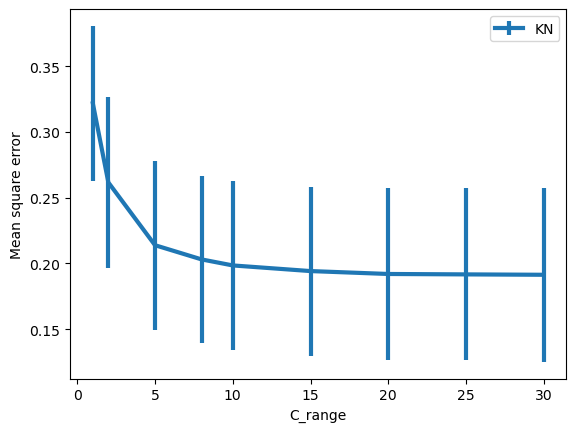

In [51]:
for col in output_columns:
    X =merged_data_final[input_columns]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    mean_err = []
    std_err = []
    for n in [1, 2, 5, 8, 10, 15, 20, 25, 30]:
        KNN = KNeighborsRegressor(n)
        KNN.fit(X_train, y_train)
        preds_test = KNN.predict(X_test)
        mse = mean_squared_error(y_test, preds_test)
        error_scores = -cross_val_score(KNN, X, y, cv=5, scoring='neg_mean_squared_error')
        mean_err.append(error_scores.mean())
        std_err.append(error_scores.std())
        print("Output Param", col)
        print("N = ", n)
        print("Error scores", error_scores.mean())
        print("\n\n")
    plt.errorbar([1, 2, 5, 8, 10, 15, 20, 25, 30], mean_err, yerr=std_err, linewidth=3, label="KN")
    plt.xlabel('C_range')
    plt.ylabel('Mean square error')
    plt.legend()
    plt.show()
    

# KNN with scaled data

In [52]:
from sklearn.preprocessing import StandardScaler

Output Param review_scores_rating
N =  1
Error scores 1.0838735080889603



Output Param review_scores_rating
N =  2
Error scores 0.8027369421367329



Output Param review_scores_rating
N =  5
Error scores 0.6660765053249702



Output Param review_scores_rating
N =  8
Error scores 0.6281253408402592



Output Param review_scores_rating
N =  10
Error scores 0.6108341038784721



Output Param review_scores_rating
N =  15
Error scores 0.5942338914334087



Output Param review_scores_rating
N =  20
Error scores 0.5893532450382601



Output Param review_scores_rating
N =  25
Error scores 0.5825374018935809



Output Param review_scores_rating
N =  30
Error scores 0.5823326171134068





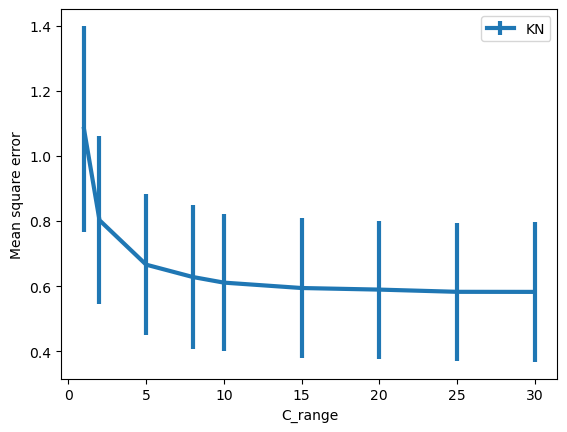

Output Param review_scores_accuracy
N =  1
Error scores 0.258491875522748



Output Param review_scores_accuracy
N =  2
Error scores 0.21453544052349066



Output Param review_scores_accuracy
N =  5
Error scores 0.18053515447806834



Output Param review_scores_accuracy
N =  8
Error scores 0.1718325785299206



Output Param review_scores_accuracy
N =  10
Error scores 0.16724659205075124



Output Param review_scores_accuracy
N =  15
Error scores 0.16288096280620112



Output Param review_scores_accuracy
N =  20
Error scores 0.16105535623503686



Output Param review_scores_accuracy
N =  25
Error scores 0.16010965202057134



Output Param review_scores_accuracy
N =  30
Error scores 0.15985675760552315





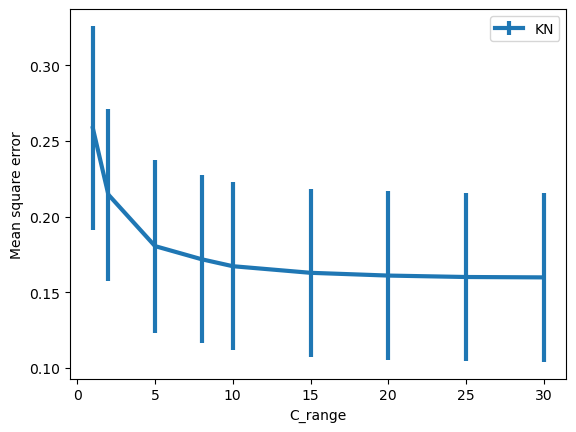

Output Param review_scores_cleanliness
N =  1
Error scores 0.4647233458012212



Output Param review_scores_cleanliness
N =  2
Error scores 0.3721560094941071



Output Param review_scores_cleanliness
N =  5
Error scores 0.31319134890003786



Output Param review_scores_cleanliness
N =  8
Error scores 0.2986945979973902



Output Param review_scores_cleanliness
N =  10
Error scores 0.2895329802281156



Output Param review_scores_cleanliness
N =  15
Error scores 0.2773611423120862



Output Param review_scores_cleanliness
N =  20
Error scores 0.2734716198150091



Output Param review_scores_cleanliness
N =  25
Error scores 0.272314648392424



Output Param review_scores_cleanliness
N =  30
Error scores 0.27059942509985835





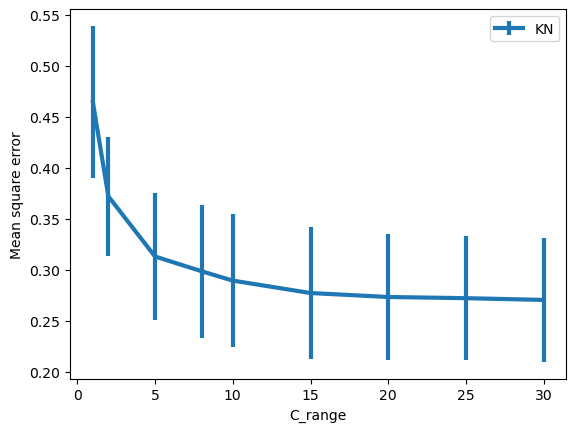

Output Param review_scores_checkin
N =  1
Error scores 0.2073643040978089



Output Param review_scores_checkin
N =  2
Error scores 0.1779977434918294



Output Param review_scores_checkin
N =  5
Error scores 0.14677601891675246



Output Param review_scores_checkin
N =  8
Error scores 0.13938225734456738



Output Param review_scores_checkin
N =  10
Error scores 0.1360360550493608



Output Param review_scores_checkin
N =  15
Error scores 0.13249584993819585



Output Param review_scores_checkin
N =  20
Error scores 0.13127331243220167



Output Param review_scores_checkin
N =  25
Error scores 0.1304795569993456



Output Param review_scores_checkin
N =  30
Error scores 0.1303339191063803





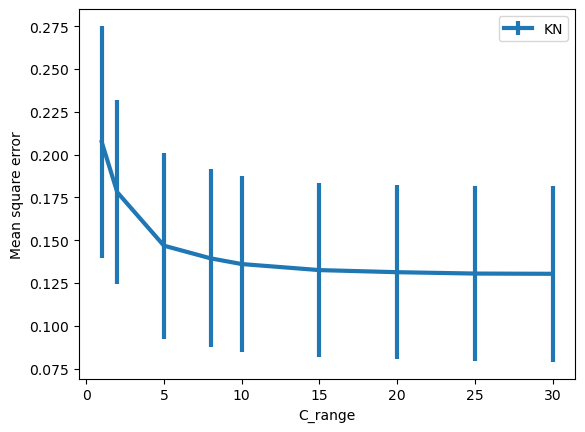

Output Param review_scores_communication
N =  1
Error scores 0.17319630015536905



Output Param review_scores_communication
N =  2
Error scores 0.14675277737259002



Output Param review_scores_communication
N =  5
Error scores 0.1267152904352341



Output Param review_scores_communication
N =  8
Error scores 0.12033211703273523



Output Param review_scores_communication
N =  10
Error scores 0.11820510680572711



Output Param review_scores_communication
N =  15
Error scores 0.11398378144061576



Output Param review_scores_communication
N =  20
Error scores 0.11333473531277224



Output Param review_scores_communication
N =  25
Error scores 0.11357967058929705



Output Param review_scores_communication
N =  30
Error scores 0.11333218258055393





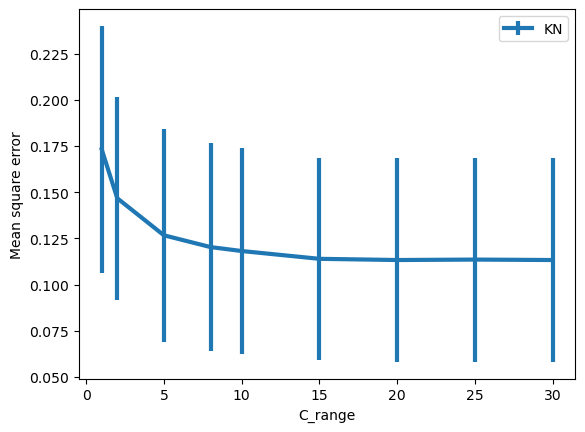

Output Param review_scores_location
N =  1
Error scores 0.2115040302548133



Output Param review_scores_location
N =  2
Error scores 0.17167043789720485



Output Param review_scores_location
N =  5
Error scores 0.1427318083915354



Output Param review_scores_location
N =  8
Error scores 0.1358762690146443



Output Param review_scores_location
N =  10
Error scores 0.1337565589264948



Output Param review_scores_location
N =  15
Error scores 0.1301327985936044



Output Param review_scores_location
N =  20
Error scores 0.12818380492627662



Output Param review_scores_location
N =  25
Error scores 0.12688707662900783



Output Param review_scores_location
N =  30
Error scores 0.12569498064371176





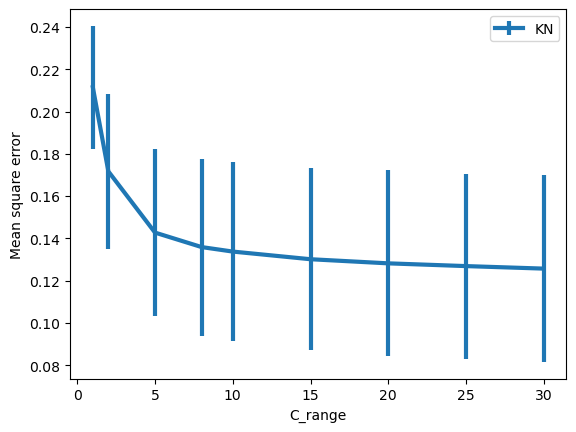

Output Param review_scores_value
N =  1
Error scores 0.3218911233009436



Output Param review_scores_value
N =  2
Error scores 0.26164766322115807



Output Param review_scores_value
N =  5
Error scores 0.21389779662470412



Output Param review_scores_value
N =  8
Error scores 0.20307055505652868



Output Param review_scores_value
N =  10
Error scores 0.1985049971723098



Output Param review_scores_value
N =  15
Error scores 0.19420889887521361



Output Param review_scores_value
N =  20
Error scores 0.19200081789765316



Output Param review_scores_value
N =  25
Error scores 0.19168560767388823



Output Param review_scores_value
N =  30
Error scores 0.19139064592048777





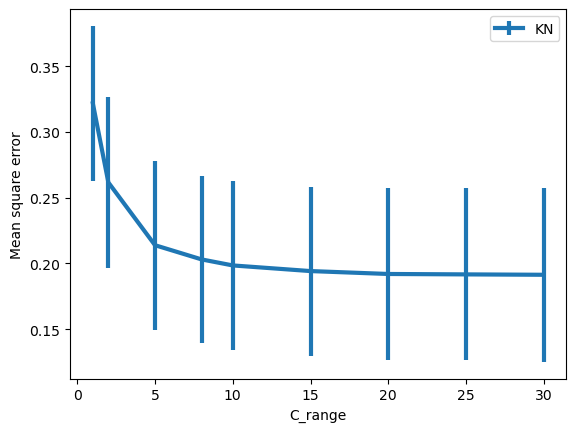

In [53]:
for col in output_columns:
    X =merged_data_final[input_columns]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    scaler_feature = StandardScaler()
    scaler_label = StandardScaler()
    scaled_train_feature = scaler_feature.fit_transform(X_train)
    scaled_train_label = scaler_label.fit_transform(y_train)
    scaled_test_feature = scaler_feature.fit_transform(X_test)
    scaled_test_label = scaler_label.fit_transform(y_test)
    mean_err = []
    std_err = []
    for n in [1, 2, 5, 8, 10, 15, 20, 25, 30]:
        KNN = KNeighborsRegressor(n)
        KNN.fit(scaled_train_feature, scaled_train_label)
        preds_test = KNN.predict(scaled_test_feature)
        error_scores = -cross_val_score(KNN, X, y, cv=5, scoring='neg_mean_squared_error')
        mean_err.append(error_scores.mean())
        std_err.append(error_scores.std())
        print("Output Param", col)
        print("N = ", n)
        print("Error scores", error_scores.mean())
        print("\n\n")
    plt.errorbar([1, 2, 5, 8, 10, 15, 20, 25, 30], mean_err, yerr=std_err, linewidth=3, label="KN")
    plt.xlabel('C_range')
    plt.ylabel('Mean square error')
    plt.legend()
    plt.show()

# Lasso

In [54]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

For columns review_scores_rating
C =  0.01
mean of error scores 0.6043432478623068
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.6034671970728483
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  0.5
mean of error scores 0.598402379143862
-----------------------------------------------
Best Features ['price', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  1
mean of error scores 0.5988603350217068
-----------------------------------------------
Best Features ['price', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  10
mean of error scores 0.5712455442549951
-----------------------------------------------
Best Features ['minimum_nights', 'comment_pos'

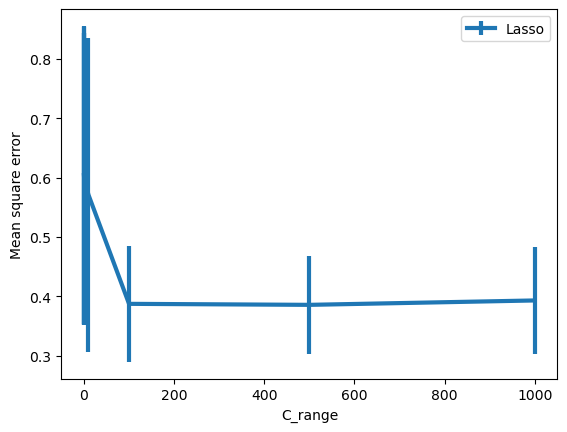

For columns review_scores_accuracy
C =  0.01
mean of error scores 0.16155255616487846
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.16246073734378647
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.5
mean of error scores 0.16239452422744
-----------------------------------------------
Best Features ['price', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  1
mean of error scores 0.16240870165282034
-----------------------------------------------
Best Features ['price', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  10
mean of error scores 0.16157978053701735
-----------------------------------------------
Best Features ['minimum_nights', 'host_response_rate', 'pric

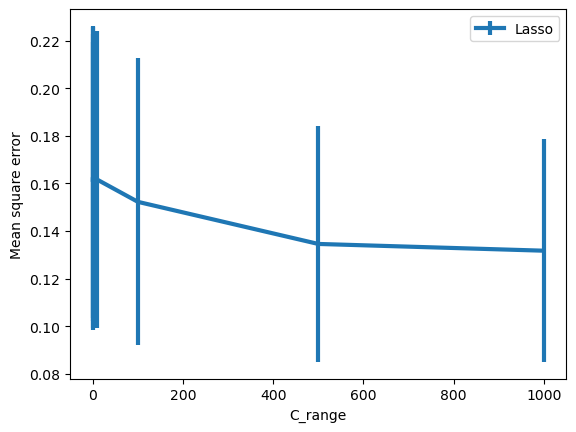

For columns review_scores_cleanliness
C =  0.01
mean of error scores 0.2783560236777867
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.27697554471781816
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.5
mean of error scores 0.2726486026277151
-----------------------------------------------
Best Features ['price', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  1
mean of error scores 0.27241281658170546
-----------------------------------------------
Best Features ['price', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  10
mean of error scores 0.27308239969449444
-----------------------------------------------
Best Features ['host_response_rate', 'price', 'number_of

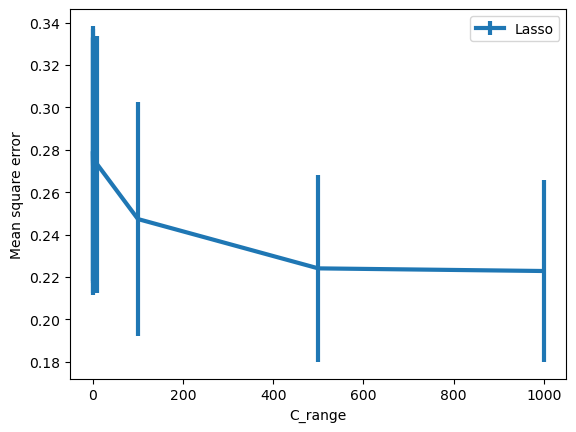

For columns review_scores_checkin
C =  0.01
mean of error scores 0.13114294143087654
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.13292892946511514
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.5
mean of error scores 0.13342513758857583
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  1
mean of error scores 0.13346142684998
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  10
mean of error scores 0.1330499736370004
-----------------------------------------------
Best Features ['minimum_nights', 'host_response_rate', 'number_of_reviews']
Numb

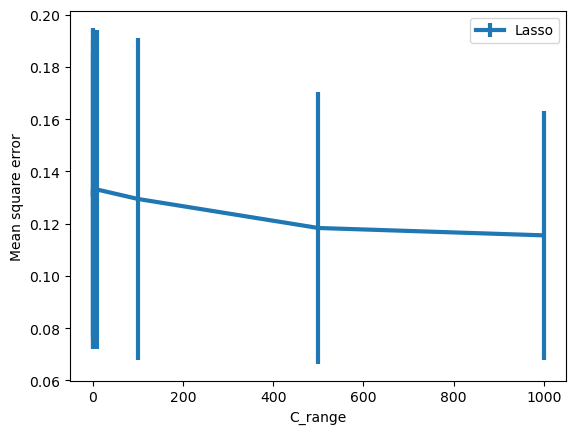

For columns review_scores_communication
C =  0.01
mean of error scores 0.1165017027247929
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.11748758862603643
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.5
mean of error scores 0.11611490671445687
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  1
mean of error scores 0.1160807910463681
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  10
mean of error scores 0.11443316900768932
-----------------------------------------------
Best Features ['minimum_nights', 'host_response_rate', 'number_of_review

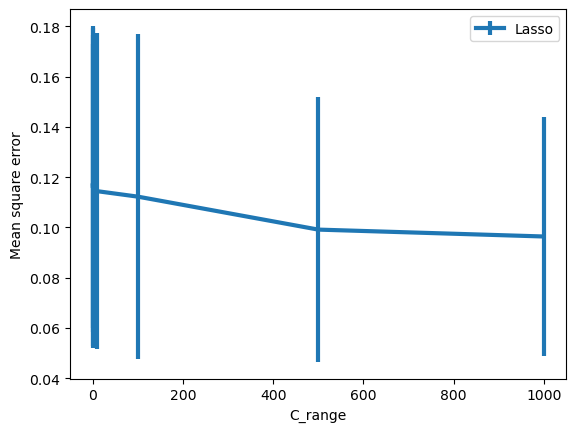

For columns review_scores_location
C =  0.01
mean of error scores 0.12334211709487886
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.12334285076441476
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.5
mean of error scores 0.12606875546649945
-----------------------------------------------
Best Features ['maximum_nights', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  1
mean of error scores 0.12746992211145725
-----------------------------------------------
Best Features ['maximum_nights', 'number_of_reviews']
Number of Best Features 2
-----------------------------------------------
C =  10
mean of error scores 0.1292840756821331
-----------------------------------------------
Best Features ['calculated_host_listings

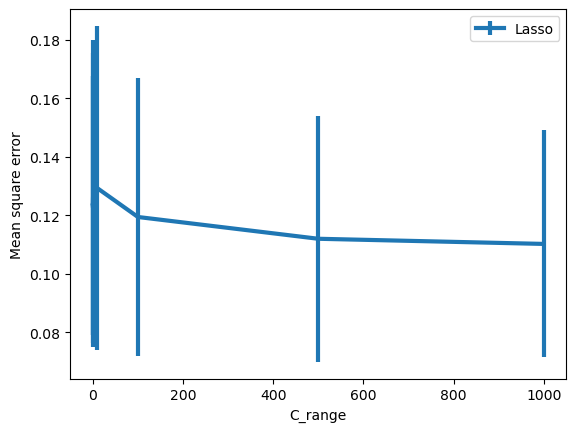

For columns review_scores_value
C =  0.01
mean of error scores 0.19351712333712784
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.19324500528904326
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.5
mean of error scores 0.1936694674280978
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  1
mean of error scores 0.19387701611625605
-----------------------------------------------
Best Features ['number_of_reviews']
Number of Best Features 1
-----------------------------------------------
C =  10
mean of error scores 0.19120596475662652
-----------------------------------------------
Best Features ['host_response_rate', 'number_of_reviews']
Number of Best Featur

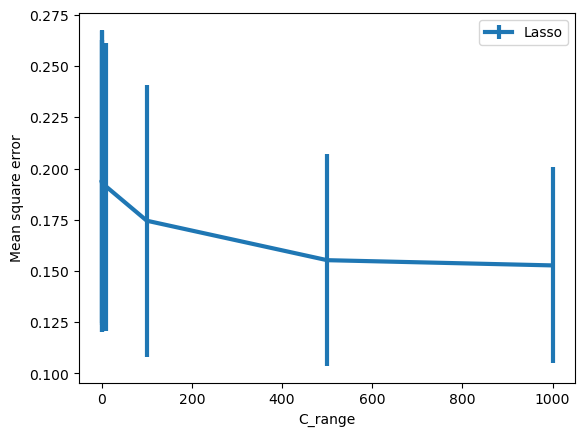

In [55]:
c_range = [0.01, 0.1, 0.5, 1, 10, 100, 500, 1000]
for col in output_columns:
    X =merged_data_final[input_columns]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    mean_err = []
    std_err = []
    print("For columns", col)
    for C in c_range:
        lasso_model = linear_model.Lasso(alpha = 1/(2*C))
        lasso_fit = lasso_model.fit(X_train, y_train)
        preds_test = lasso_fit.predict(X_test)
        mse = mean_squared_error(y_test, preds_test)
#         score_train = lasso_fit.score(X_train, y_train)
#         score_test = lasso_model.score(X_test, y_test)
        print("C = ", C)
#         print("Train Score = ",score_train)
        error_scores = -cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
        mean_err.append(error_scores.mean())
        std_err.append(error_scores.std())
        coef_val = lasso_fit.coef_
        print('mean of error scores', error_scores.mean())
        test_len = {}
        index_list = []
        for i, val in enumerate(coef_val):
            if val > 0:
                test_len[i] = val
                index_list.append(i)

        best_features = []
        for i in index_list:
            best_features.append(input_columns[i])
        print("-----------------------------------------------")
        print("Best Features", best_features)
        print("Number of Best Features", len(best_features))
        print("-----------------------------------------------")
    print("-----------------------------------------")
    plt.errorbar(c_range, mean_err, yerr=std_err, linewidth=3, label="Lasso")
    plt.xlabel('C_range')
    plt.ylabel('Mean square error')
    plt.legend()
    plt.show()

# SVR

In [12]:
from sklearn.svm import SVR

Cross Validation Score for SVR is: 0.6347699954142638 C =  0.1
Cross Validation Score for SVR is: 0.6332092190185901 C =  1
Cross Validation Score for SVR is: 0.6331545715839756 C =  10
Cross Validation Score for SVR is: 0.6314110039877768 C =  20
Cross Validation Score for SVR is: 0.6269905467533252 C =  50
Cross Validation Score for SVR is: 0.6240426124792688 C =  100


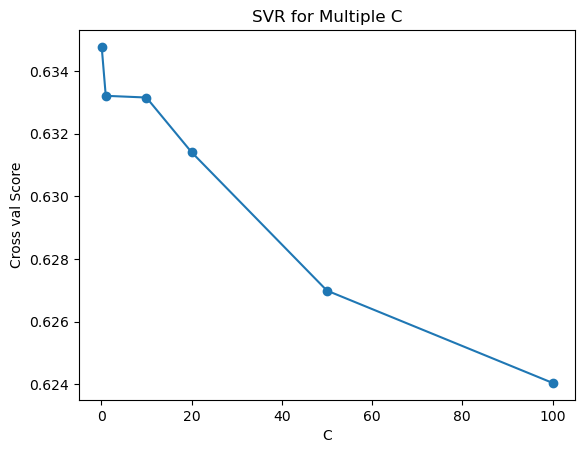

Cross Validation Score for SVR is: 0.16784753586553008 C =  0.1


In [ ]:
score = []
c_range = [0.1, 1, 10, 20, 50, 100]
for col in output_columns:
    X =merged_data_final[input_columns]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    for c in c_range:
        SVR_Model = SVR(kernel='rbf', C = c)
        SVR_Model.fit(X_train, y_train)
        val_score = cross_val_score(SVR_Model, X_train, y_train, cv = 5,scoring = 'neg_mean_squared_error')
        score.append(abs(np.array(val_score).mean()))
        print(f'Cross Validation Score for SVR is: {abs(np.array(val_score).mean())}', "C = ", c)
    plt.plot(c_range, score,marker = 'o')
    plt.xlabel("C")
    plt.ylabel("Cross val Score")
    plt.title("SVR for Multiple C")
    plt.show()

# lasso for review_scores_rating with other output params

In [58]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

For columns review_scores_rating
C =  0.01
mean of error scores 0.6043432478623068
-----------------------------------------------
Best Features []
Number of Best Features 0
-----------------------------------------------
C =  0.1
mean of error scores 0.6034671970728483
-----------------------------------------------
Best Features ['location_from_lat_lng_Spitalfields,TheLiberties,MerchantsQuayBED,Dublin,Dublin8,Leinster,D08KX89,Éire/Ireland']
Number of Best Features 1
-----------------------------------------------
C =  0.5
mean of error scores 0.598402379143862
-----------------------------------------------
Best Features ["location_from_lat_lng_21,StJames'Walk,UshersCED,Dublin,CountyDublin,Leinster,D08F2C5,Éire/Ireland", 'location_from_lat_lng_Spitalfields,TheLiberties,MerchantsQuayBED,Dublin,Dublin8,Leinster,D08KX89,Éire/Ireland']
Number of Best Features 2
-----------------------------------------------
C =  1
mean of error scores 0.5988603350217068
---------------------------------

C =  1000
mean of error scores 0.3522073102364198
-----------------------------------------------
Best Features ['longitude', 'Hostgreetsyou', 'calculated_host_listings_count', 'Hairdryer', 'bathrooms_text_1.5baths', 'BBQgrill', 'has_availability', 'room_type_Privateroom', 'host_about_pos', 'Longtermstaysallowed', 'location_from_lat_lng_CastleknockCeltic-AllWeatherPitch,CastleknockRise,Carpenterstown,Castleknock-KnockmaroonED,Blanchardstown,Fingal,CountyDublin,Leinster,D15NX98,Éire/Ireland', 'location_from_lat_lng_BreffniRoad,Bullock,Dalkey-BullockED,Dalkey,DúnLaoghaire-Rathdown,CountyDublin,Leinster,A96DP48,Éire/Ireland', 'location_from_lat_lng_44,HardimanRoad,DrumcondraSouthCED,Dublin,CountyDublin,Leinster,D09PT78,Éire/Ireland', 'location_from_lat_lng_10,FinnStreet,Oxmantown,ArranQuayDED,Dublin,CountyDublin,Leinster,D07E1RD,Éire/Ireland', 'HDTV', 'location_from_lat_lng_SusanTerrace,TheTenters,MerchantsQuayDED,Dublin,Dublin8,Leinster,D08EP02,Éire/Ireland', 'location_from_lat_lng_23,Ha

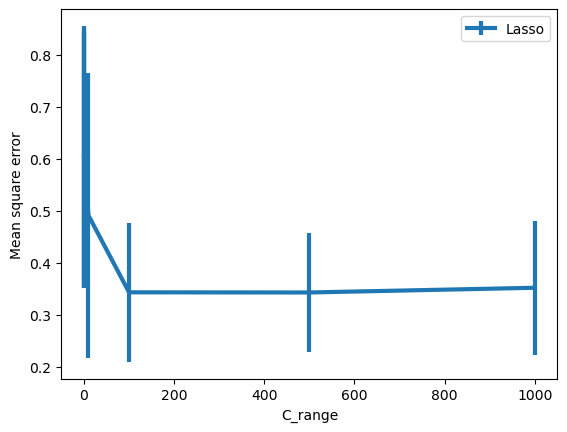

In [61]:
c_range = [0.01, 0.1, 0.5, 1, 10, 100, 500, 1000]
for col in output_overall_rating:
    X =merged_data_final[overall_input]
    y = merged_data_final[col]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    mean_err = []
    std_err = []
    print("For columns", col)
    for C in c_range:
        lasso_model = linear_model.Lasso(alpha = 1/(2*C))
        lasso_fit = lasso_model.fit(X_train, y_train)
        preds_test = lasso_fit.predict(X_test)
        mse = mean_squared_error(y_test, preds_test)
#         score_train = lasso_fit.score(X_train, y_train)
#         score_test = lasso_model.score(X_test, y_test)
        print("C = ", C)
#         print("Train Score = ",score_train)
        error_scores = -cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
        mean_err.append(error_scores.mean())
        std_err.append(error_scores.std())
        coef_val = lasso_fit.coef_
        print('mean of error scores', error_scores.mean())
        test_len = {}
        index_list = []
        for i, val in enumerate(coef_val):
            if val > 0:
                test_len[i] = val
                index_list.append(i)

        best_features = []
        for i in index_list:
            best_features.append(input_columns[i])
        print("-----------------------------------------------")
        print("Best Features", best_features)
        print("Number of Best Features", len(best_features))
        print("-----------------------------------------------")
    print("-----------------------------------------")
    plt.errorbar(c_range, mean_err, yerr=std_err, linewidth=3, label="Lasso")
    plt.xlabel('C_range')
    plt.ylabel('Mean square error')
    plt.legend()
    plt.show()

# linear regression for best params

In [84]:
best_features_dict = {'review_scores_rating': ['Hostgreetsyou', 'calculated_host_listings_count', 'Hairdryer', 'Privatefencedgardenorbackyard', 'has_availability', 'minimum_nights', 'Washer', 'Pack2019nplay/Travelcrib-availableuponrequest', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Dishwasher', 'Freestreetparking', 'Wifi', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'property_type_Privateroomintownhouse', 'property_type_Entiretownhouse', 'Cleaningproducts', 'Freeparkingonpremises', 'Patioorbalcony', 'Outdoorfurniture', 'Gameconsole', 'Extrapillowsandblankets', 'Dryer.1', 'room_type_Entirehome/apt', 'Hotwater', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'property_type_Privateroomincabin', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'host_is_superhost', 'Essentials.1', 'number_of_reviews', 'Firstaidkit', 'host_identity_verified', 'bathrooms_text_2.5baths','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],
                    'review_scores_accuracy':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'bathrooms_text_1bath', 'host_response_time_withinafewhours', 'minimum_nights', 'Iron', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Freestreetparking', 'Wifi', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'Freeparkingonpremises', 'Gameconsole', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'Babybath', 'Essentials.1', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_checkin':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'Coffeemaker', 'Kitchen', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Freeparkingonpremises', 'Gameconsole', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_communication':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'room_type_Privateroom', 'Coffeemaker', 'Freestreetparking', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Cleaningproducts', 'Bakingsheet', 'Freeparkingonpremises', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'Indoorfireplace', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'property_type_Entirehome', 'host_response_time_afewdaysormore', 'Heating', 'host_is_superhost', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_location':['longitude', 'Hostgreetsyou', 'calculated_host_listings_count', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'BBQgrill', 'location_from_lat_lng_TempleBar,AstonQuay,RoyalExchangeAED,Dublin,CountyDublin,Leinster,D01E8P4,Éire/Ireland', 'minimum_nights', 'Oven.1', 'Iron', 'Longtermstaysallowed', 'maximum_nights', 'Washer', 'accommodates', 'Coffeemaker', 'Coffeemaker.1', 'Waterfront', 'Paidparkingonpremises', 'Wifi', 'Dedicatedworkspace', 'comment_pos', 'Luggagedropoffallowed', 'Bakingsheet', 'Shampoo', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Hotwater', 'Stove', 'Indoorfireplace', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'Elevator', 'host_is_superhost', 'Essentials.1', 'Paidparkingoffpremises', 'number_of_reviews', 'Cleaningbeforecheckout', 'bathrooms_text_2.5baths', 'number_of_reviews_ltm'],
                    'review_scores_value': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'host_response_time_withinafewhours', 'Freewasher2013Inbuilding', 'Clothingstorage:closetanddresser', 'Washer', 'Coffeemaker', 'Coffeemaker.1', 'Dishwasher', 'Freestreetparking', 'Privateentrance', 'Wifi', 'Kitchen', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Bakingsheet', 'Freeparkingonpremises', 'Shampoo', 'Patioorbalcony', 'Hangers', 'Extrapillowsandblankets', 'Indoorfireplace', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'Dryingrackforclothing', 'neighborhood_overview', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'Babybath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit', 'bathrooms_text_2.5baths', 'Children2019sdinnerware'],
                    'review_scores_cleanliness': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Iron', 'Coffeemaker', 'Privateentrance', 'bathrooms_text_1privatebath', 'comment_pos', 'Freeparkingonpremises', 'Shampoo', 'room_type_Entirehome/apt', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit']}

In [85]:
for op in best_features_dict.keys():
    X =merged_data_final[best_features_dict[op]]
    y = merged_data_final[op]
    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    linear_model = LinearRegression().fit(X_train, y_train)

    print("\n\nFor ", op)
    score = linear_model.score(X, y)
    print("\nModel Score", score)

    y_test_prediction = linear_model.predict(X_test)
    root_mean_squared_error_test = (mean_squared_error(y_test, y_test_prediction))
    r2_score_test = r2_score(y_test, y_test_prediction)

    print("mean squared error on test", root_mean_squared_error_test)
    print("r2 score on test", r2_score_test)
    print("------------------------------------------------------")



For  review_scores_rating

Model Score 0.47550403400672314
mean squared error on test 0.3161094016366377
r2 score on test 0.44718639455708664
------------------------------------------------------


For  review_scores_accuracy

Model Score 0.11347060518222196
mean squared error on test 0.17582239809285344
r2 score on test 0.1094420066443147
------------------------------------------------------


For  review_scores_checkin

Model Score 0.08741728898352674
mean squared error on test 0.1055101115890868
r2 score on test 0.07083651832476379
------------------------------------------------------


For  review_scores_communication

Model Score 0.0872758635412677
mean squared error on test 0.09123140192326235
r2 score on test 0.0793952448915125
------------------------------------------------------


For  review_scores_location

Model Score 0.10395495965817547
mean squared error on test 0.09759687986792762
r2 score on test 0.09120084921528315
------------------------------------------------

# KNN with best features

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [22]:
best_features_dict = {'review_scores_rating': ['Hostgreetsyou', 'calculated_host_listings_count', 'Hairdryer', 'Privatefencedgardenorbackyard', 'has_availability', 'minimum_nights', 'Washer', 'Pack2019nplay/Travelcrib-availableuponrequest', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Dishwasher', 'Freestreetparking', 'Wifi', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'property_type_Privateroomintownhouse', 'property_type_Entiretownhouse', 'Cleaningproducts', 'Freeparkingonpremises', 'Patioorbalcony', 'Outdoorfurniture', 'Gameconsole', 'Extrapillowsandblankets', 'Dryer.1', 'room_type_Entirehome/apt', 'Hotwater', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'property_type_Privateroomincabin', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'host_is_superhost', 'Essentials.1', 'number_of_reviews', 'Firstaidkit', 'host_identity_verified', 'bathrooms_text_2.5baths','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],
                    'review_scores_accuracy':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'bathrooms_text_1bath', 'host_response_time_withinafewhours', 'minimum_nights', 'Iron', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Freestreetparking', 'Wifi', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'Freeparkingonpremises', 'Gameconsole', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'Babybath', 'Essentials.1', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_checkin':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'Coffeemaker', 'Kitchen', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Freeparkingonpremises', 'Gameconsole', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_communication':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'room_type_Privateroom', 'Coffeemaker', 'Freestreetparking', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Cleaningproducts', 'Bakingsheet', 'Freeparkingonpremises', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'Indoorfireplace', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'property_type_Entirehome', 'host_response_time_afewdaysormore', 'Heating', 'host_is_superhost', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_location':['longitude', 'Hostgreetsyou', 'calculated_host_listings_count', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'BBQgrill', 'location_from_lat_lng_TempleBar,AstonQuay,RoyalExchangeAED,Dublin,CountyDublin,Leinster,D01E8P4,Éire/Ireland', 'minimum_nights', 'Oven.1', 'Iron', 'Longtermstaysallowed', 'maximum_nights', 'Washer', 'accommodates', 'Coffeemaker', 'Coffeemaker.1', 'Waterfront', 'Paidparkingonpremises', 'Wifi', 'Dedicatedworkspace', 'comment_pos', 'Luggagedropoffallowed', 'Bakingsheet', 'Shampoo', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Hotwater', 'Stove', 'Indoorfireplace', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'Elevator', 'host_is_superhost', 'Essentials.1', 'Paidparkingoffpremises', 'number_of_reviews', 'Cleaningbeforecheckout', 'bathrooms_text_2.5baths', 'number_of_reviews_ltm'],
                    'review_scores_value': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'host_response_time_withinafewhours', 'Freewasher2013Inbuilding', 'Clothingstorage:closetanddresser', 'Washer', 'Coffeemaker', 'Coffeemaker.1', 'Dishwasher', 'Freestreetparking', 'Privateentrance', 'Wifi', 'Kitchen', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Bakingsheet', 'Freeparkingonpremises', 'Shampoo', 'Patioorbalcony', 'Hangers', 'Extrapillowsandblankets', 'Indoorfireplace', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'Dryingrackforclothing', 'neighborhood_overview', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'Babybath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit', 'bathrooms_text_2.5baths', 'Children2019sdinnerware'],
                    'review_scores_cleanliness': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Iron', 'Coffeemaker', 'Privateentrance', 'bathrooms_text_1privatebath', 'comment_pos', 'Freeparkingonpremises', 'Shampoo', 'room_type_Entirehome/apt', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit']}

In [23]:
for op in best_features_dict.keys():
    X =merged_data_final[best_features_dict[op]]
    y = merged_data_final[op]
    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    KNN = KNeighborsRegressor(10)
    KNN.fit(X_train, y_train)
    preds_test = KNN.predict(X_test)
    error_scores = -cross_val_score(KNN, X, y, cv=5, scoring='neg_mean_squared_error')
    mean_err = error_scores.mean()
    std_err = error_scores.std()
    print("Output Param", op)
    print("N = ", 10)
    print("Error scores", error_scores.mean())
    print("\n\n")

Output Param review_scores_rating
N =  10
Error scores 0.45422448740801313



Output Param review_scores_accuracy
N =  10
Error scores 0.16806276852766064



Output Param review_scores_checkin
N =  10
Error scores 0.1388236053206879



Output Param review_scores_communication
N =  10
Error scores 0.11935951620214305



Output Param review_scores_location
N =  10
Error scores 0.13030968381766284



Output Param review_scores_value
N =  10
Error scores 0.19154599878822837



Output Param review_scores_cleanliness
N =  10
Error scores 0.2873052560589252





# lasso with best params and c value

In [79]:
best_features_dict = {'review_scores_rating': ['Hostgreetsyou', 'calculated_host_listings_count', 'Hairdryer', 'Privatefencedgardenorbackyard', 'has_availability', 'minimum_nights', 'Washer', 'Pack2019nplay/Travelcrib-availableuponrequest', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Dishwasher', 'Freestreetparking', 'Wifi', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'property_type_Privateroomintownhouse', 'property_type_Entiretownhouse', 'Cleaningproducts', 'Freeparkingonpremises', 'Patioorbalcony', 'Outdoorfurniture', 'Gameconsole', 'Extrapillowsandblankets', 'Dryer.1', 'room_type_Entirehome/apt', 'Hotwater', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'property_type_Privateroomincabin', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'host_is_superhost', 'Essentials.1', 'number_of_reviews', 'Firstaidkit', 'host_identity_verified', 'bathrooms_text_2.5baths','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],
                    'review_scores_accuracy':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'bathrooms_text_1bath', 'host_response_time_withinafewhours', 'minimum_nights', 'Iron', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Freestreetparking', 'Wifi', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'Freeparkingonpremises', 'Gameconsole', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'Babybath', 'Essentials.1', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_checkin':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'Coffeemaker', 'Kitchen', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Freeparkingonpremises', 'Gameconsole', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_communication':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'room_type_Privateroom', 'Coffeemaker', 'Freestreetparking', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Cleaningproducts', 'Bakingsheet', 'Freeparkingonpremises', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'Indoorfireplace', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'property_type_Entirehome', 'host_response_time_afewdaysormore', 'Heating', 'host_is_superhost', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_location':['longitude', 'Hostgreetsyou', 'calculated_host_listings_count', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'BBQgrill', 'location_from_lat_lng_TempleBar,AstonQuay,RoyalExchangeAED,Dublin,CountyDublin,Leinster,D01E8P4,Éire/Ireland', 'minimum_nights', 'Oven.1', 'Iron', 'Longtermstaysallowed', 'maximum_nights', 'Washer', 'accommodates', 'Coffeemaker', 'Coffeemaker.1', 'Waterfront', 'Paidparkingonpremises', 'Wifi', 'Dedicatedworkspace', 'comment_pos', 'Luggagedropoffallowed', 'Bakingsheet', 'Shampoo', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Hotwater', 'Stove', 'Indoorfireplace', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'Elevator', 'host_is_superhost', 'Essentials.1', 'Paidparkingoffpremises', 'number_of_reviews', 'Cleaningbeforecheckout', 'bathrooms_text_2.5baths', 'number_of_reviews_ltm'],
                    'review_scores_value': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'host_response_time_withinafewhours', 'Freewasher2013Inbuilding', 'Clothingstorage:closetanddresser', 'Washer', 'Coffeemaker', 'Coffeemaker.1', 'Dishwasher', 'Freestreetparking', 'Privateentrance', 'Wifi', 'Kitchen', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Bakingsheet', 'Freeparkingonpremises', 'Shampoo', 'Patioorbalcony', 'Hangers', 'Extrapillowsandblankets', 'Indoorfireplace', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'Dryingrackforclothing', 'neighborhood_overview', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'Babybath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit', 'bathrooms_text_2.5baths', 'Children2019sdinnerware'],
                    'review_scores_cleanliness': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Iron', 'Coffeemaker', 'Privateentrance', 'bathrooms_text_1privatebath', 'comment_pos', 'Freeparkingonpremises', 'Shampoo', 'room_type_Entirehome/apt', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit']}

In [80]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [81]:

for op in best_features_dict.keys():
    X =merged_data_final[best_features_dict[op]]
    y = merged_data_final[op]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print("For Output column", op)
    lasso_model = linear_model.Lasso(alpha = 1/(2*500))
    lasso_fit = lasso_model.fit(X_train, y_train)
    preds_test = lasso_fit.predict(X_test)
    mse = mean_squared_error(y_test, preds_test)
    print("C = ", 500)
    error_scores = -cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
    
    coef_val = lasso_fit.coef_
    print('mean of error scores', error_scores.mean())
    print("----------------------------------------------------------")
print("-----------------------------------------")

For Output column review_scores_rating
C =  500
mean of error scores 0.3498949162794248
----------------------------------------------------------
For Output column review_scores_accuracy
C =  500
mean of error scores 0.16095365129544895
----------------------------------------------------------
For Output column review_scores_checkin
C =  500
mean of error scores 0.12270400747777739
----------------------------------------------------------
For Output column review_scores_communication
C =  500
mean of error scores 0.10928819343342995
----------------------------------------------------------
For Output column review_scores_location
C =  500
mean of error scores 0.1126229801964855
----------------------------------------------------------
For Output column review_scores_value
C =  500
mean of error scores 0.16953468508126257
----------------------------------------------------------
For Output column review_scores_cleanliness
C =  500
mean of error scores 0.2602933758594036
----------

# SVR with best features

In [16]:
best_features_dict = {'review_scores_rating': ['Hostgreetsyou', 'calculated_host_listings_count', 'Hairdryer', 'Privatefencedgardenorbackyard', 'has_availability', 'minimum_nights', 'Washer', 'Pack2019nplay/Travelcrib-availableuponrequest', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Dishwasher', 'Freestreetparking', 'Wifi', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'property_type_Privateroomintownhouse', 'property_type_Entiretownhouse', 'Cleaningproducts', 'Freeparkingonpremises', 'Patioorbalcony', 'Outdoorfurniture', 'Gameconsole', 'Extrapillowsandblankets', 'Dryer.1', 'room_type_Entirehome/apt', 'Hotwater', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'property_type_Privateroomincabin', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'host_is_superhost', 'Essentials.1', 'number_of_reviews', 'Firstaidkit', 'host_identity_verified', 'bathrooms_text_2.5baths','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'],
                    'review_scores_accuracy':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'bathrooms_text_1bath', 'host_response_time_withinafewhours', 'minimum_nights', 'Iron', 'Coffeemaker', 'Coffeemaker.1', 'Lockbox', 'Freestreetparking', 'Wifi', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'Freeparkingonpremises', 'Gameconsole', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'Babybath', 'Essentials.1', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_checkin':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'Coffeemaker', 'Kitchen', 'bathrooms_text_1privatebath', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Freeparkingonpremises', 'Gameconsole', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Essentials', 'Indoorfireplace', 'Children2019sbooksandtoys', 'Singlelevelhome', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'TV', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'bathrooms_text_1sharedbath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_communication':['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'minimum_nights', 'room_type_Privateroom', 'Coffeemaker', 'Freestreetparking', 'Kitchen', 'comment_pos', 'Diningtable', 'TVwithstandardcable.1', 'Cleaningproducts', 'Bakingsheet', 'Freeparkingonpremises', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'Indoorfireplace', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'work_email', 'property_type_Entirehome', 'host_response_time_afewdaysormore', 'Heating', 'host_is_superhost', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit'],
                    'review_scores_location':['longitude', 'Hostgreetsyou', 'calculated_host_listings_count', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'BBQgrill', 'location_from_lat_lng_TempleBar,AstonQuay,RoyalExchangeAED,Dublin,CountyDublin,Leinster,D01E8P4,Éire/Ireland', 'minimum_nights', 'Oven.1', 'Iron', 'Longtermstaysallowed', 'maximum_nights', 'Washer', 'accommodates', 'Coffeemaker', 'Coffeemaker.1', 'Waterfront', 'Paidparkingonpremises', 'Wifi', 'Dedicatedworkspace', 'comment_pos', 'Luggagedropoffallowed', 'Bakingsheet', 'Shampoo', 'Laundromatnearby', 'Hangers', 'Room-darkeningshades', 'Extrapillowsandblankets', 'room_type_Entirehome/apt', 'Hotwater', 'Stove', 'Indoorfireplace', 'Privatepatioorbalcony', 'Nespressomachine', 'neighborhood_overview', 'host_response_rate', 'Elevator', 'host_is_superhost', 'Essentials.1', 'Paidparkingoffpremises', 'number_of_reviews', 'Cleaningbeforecheckout', 'bathrooms_text_2.5baths', 'number_of_reviews_ltm'],
                    'review_scores_value': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Privatefencedgardenorbackyard', 'host_response_time_withinafewhours', 'Freewasher2013Inbuilding', 'Clothingstorage:closetanddresser', 'Washer', 'Coffeemaker', 'Coffeemaker.1', 'Dishwasher', 'Freestreetparking', 'Privateentrance', 'Wifi', 'Kitchen', 'Dedicatedworkspace', 'bathrooms_text_1privatebath', 'comment_pos', 'TVwithstandardcable.1', 'Luggagedropoffallowed', 'property_type_Entiretownhouse', 'Bakingsheet', 'Freeparkingonpremises', 'Shampoo', 'Patioorbalcony', 'Hangers', 'Extrapillowsandblankets', 'Indoorfireplace', 'Wineglasses', 'Singlelevelhome', 'Privatepatioorbalcony', 'Nespressomachine', 'Dryingrackforclothing', 'neighborhood_overview', 'TV', 'property_type_Entirehome', 'Heating', 'Elevator', 'host_is_superhost', 'Babybath', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit', 'bathrooms_text_2.5baths', 'Children2019sdinnerware'],
                    'review_scores_cleanliness': ['Hostgreetsyou', 'Breakfast', 'Hairdryer', 'Iron', 'Coffeemaker', 'Privateentrance', 'bathrooms_text_1privatebath', 'comment_pos', 'Freeparkingonpremises', 'Shampoo', 'room_type_Entirehome/apt', 'Privatepatioorbalcony', 'neighborhood_overview', 'host_response_rate', 'property_type_Entirehome', 'Heating', 'host_is_superhost', 'price', 'number_of_reviews', 'property_type_Privateroominhome', 'Firstaidkit']}

In [20]:
for op in best_features_dict.keys():
    X =merged_data_final[best_features_dict[op]]
    y = merged_data_final[op]
    X = np.array(X)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    SVR_Model = SVR(kernel='rbf', C = 10)
    SVR_Model.fit(X_train, y_train)
    val_score = cross_val_score(SVR_Model, X_train, y_train, cv = 5,scoring = 'neg_mean_squared_error')
    score.append(abs(np.array(val_score).mean()))
    print(f'Cross Validation Score for SVR is: {abs(np.array(val_score).mean())}', "C = ", 10)

Cross Validation Score for SVR is: 0.46584444128620917 C =  10
Cross Validation Score for SVR is: 0.17735662427282106 C =  10
Cross Validation Score for SVR is: 0.1259821040308225 C =  10
Cross Validation Score for SVR is: 0.11018775289603373 C =  10
Cross Validation Score for SVR is: 0.13177253835132388 C =  10
Cross Validation Score for SVR is: 0.17966530099917505 C =  10
Cross Validation Score for SVR is: 0.28660589180167684 C =  10
